In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
train = pd.read_csv("sales_train.csv", index_col='date', parse_dates=True,
                    dayfirst=True)
train = train.sort_index()

In [5]:
items = pd.read_csv("items.csv")

In [8]:
categories = pd.read_csv("item_categories.csv")

In [12]:
shops = pd.read_csv("shops.csv")

In [ ]:
shops.head()

In [11]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [10]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### Data understanding

In [49]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [46]:
train.head(20)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-01,0,46,18616,349.0,1.0
2013-01-01,0,54,11854,199.0,1.0
2013-01-01,0,28,4906,1799.0,1.0
2013-01-01,0,42,2931,99.0,1.0
2013-01-01,0,54,11604,349.0,1.0
2013-01-01,0,15,3686,899.0,1.0
2013-01-01,0,54,11576,149.0,1.0
2013-01-01,0,54,11573,148.0,1.0
2013-01-01,0,54,11562,299.0,1.0


In [33]:
len(train.shop_id.unique())

# we have 60 shops

60

missing 40 days in the data

In [48]:
len(train.groupby('date')) - len(train.resample('d'))

-40

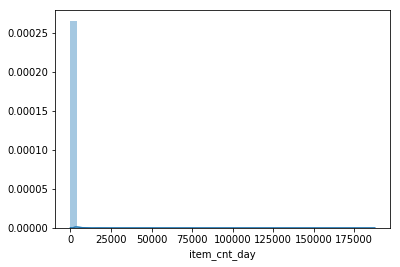

In [103]:
perc = (train.groupby('item_id').sum().sort_values('item_cnt_day', ascending=False))
sns.distplot(perc.item_cnt_day);

In [134]:
(perc.item_cnt_day / perc.item_cnt_day.sum())[:6600].sum()

0.9013054635620905

by months

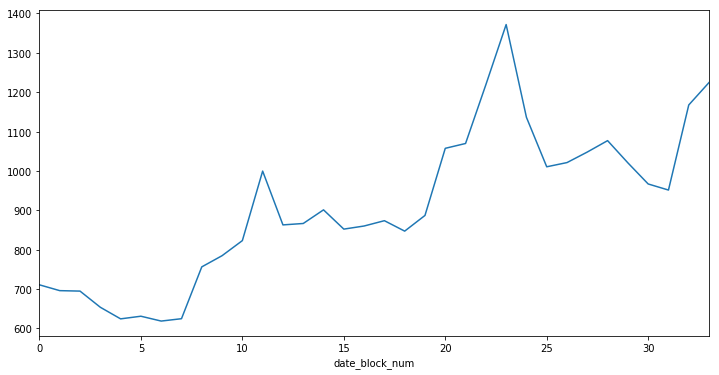

In [101]:
train.groupby('date_block_num').mean().item_price.plot(figsize=(12, 6));

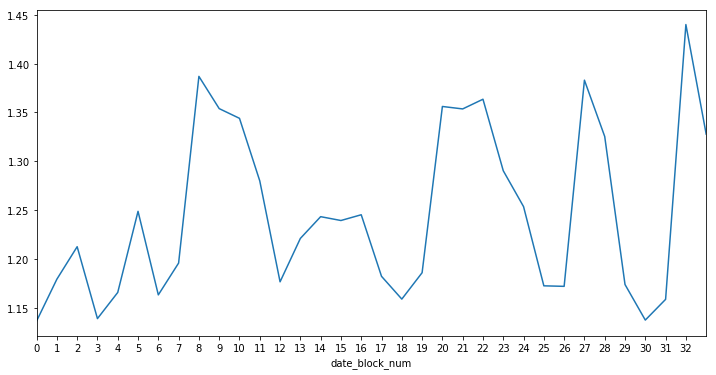

In [99]:
train.groupby('date_block_num').mean().item_cnt_day.plot(xticks=range(33), figsize=(12, 6));

by shops

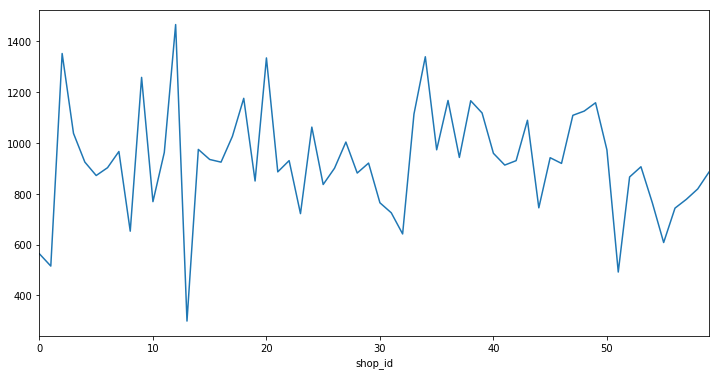

In [109]:
train.groupby('shop_id').mean().item_price.plot(figsize=(12, 6))

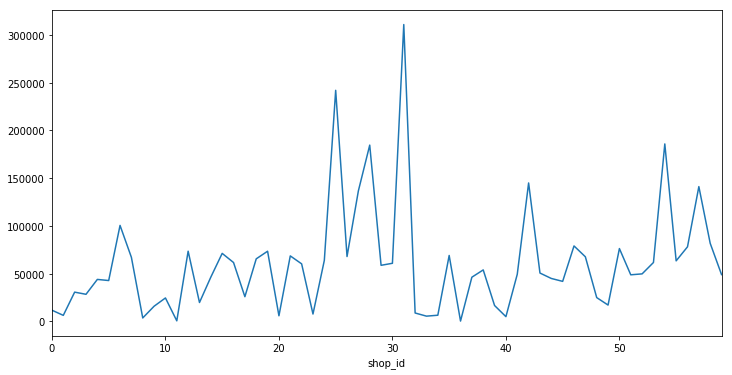

In [119]:
train.groupby('shop_id').sum().item_cnt_day.plot(figsize=(12, 6));

In [142]:
train.groupby('item_id') len > 60

In [ ]:
train.groupby('item_id').item_cnt_day.std().sort_values()